# Sales Price Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
sns.set()

In [3]:
data = pd.read_csv('C:/Users/HP/Downloads/1.04.+Real-life+example.csv')
data


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


## 1. Preprocessing of data

### 1.1 Data Cleaning 

#### 1.1.1 Handling Missing values

In [4]:
data.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

Missing values are in:
1. Price column 
2. Engine Volume
3. Check the percentage of missing values, if less than 5% then drop them

In [5]:
num1 = data['Price'].isna().sum()
percentage_p_null = num1 / len(data) * 100
print('Percentage of Null values in price column: {0}'.format(percentage_p_null))

num2 = data['EngineV'].isna().sum()
percentage_e_null = num2 / len(data) * 100
print('Percentage of Null values in engine volume column: {0}'.format(percentage_e_null))

Percentage of Null values in price column: 3.958573072497123
Percentage of Null values in engine volume column: 3.452243958573072


In [6]:
data.dropna(axis = 0, inplace = True)

#### 1.1.2 Outlier Detection

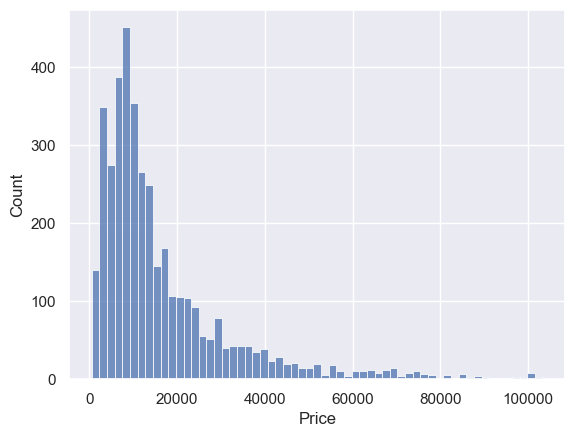

In [7]:
value = data['Price'].quantile(0.98)
data = data[data['Price'] < value]
sns.histplot(data['Price']);

<Axes: xlabel='Mileage', ylabel='Count'>

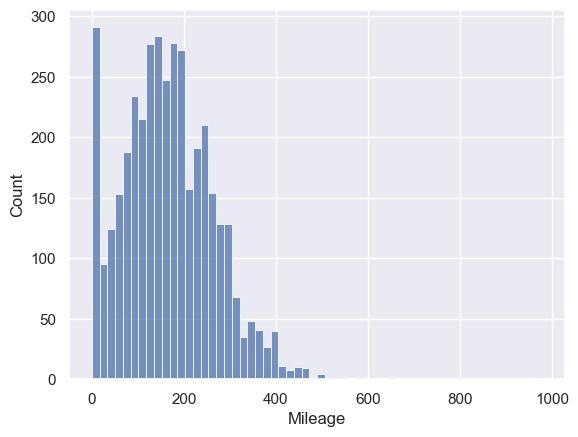

In [8]:
sns.histplot(data['Mileage'])

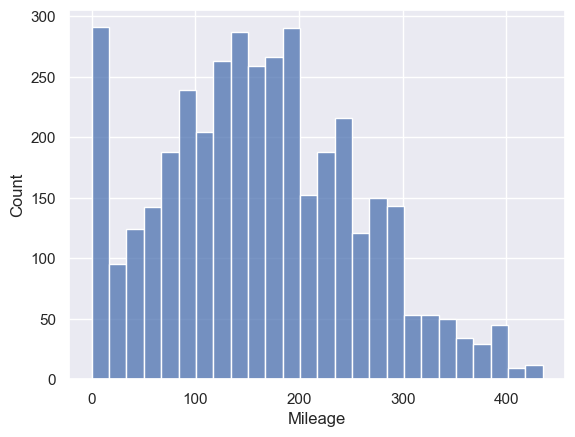

In [9]:
value = data['Mileage'].quantile(0.99)
data = data[data['Mileage'] < value]
sns.histplot(data['Mileage']);

C:\Users\HP\AppData\Local\Temp\ipykernel_944\3893327027.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

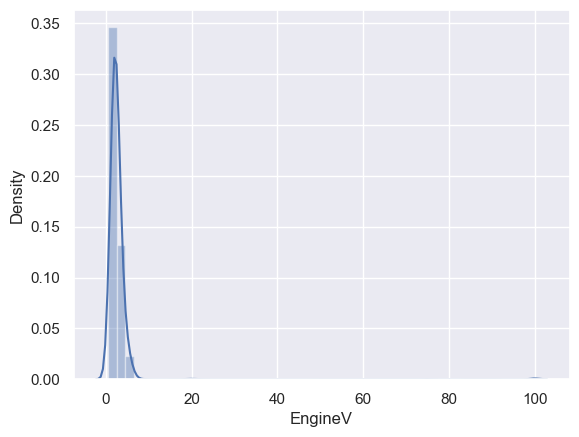

In [10]:
sns.distplot(data['EngineV'])

<Axes: xlabel='EngineV', ylabel='Count'>

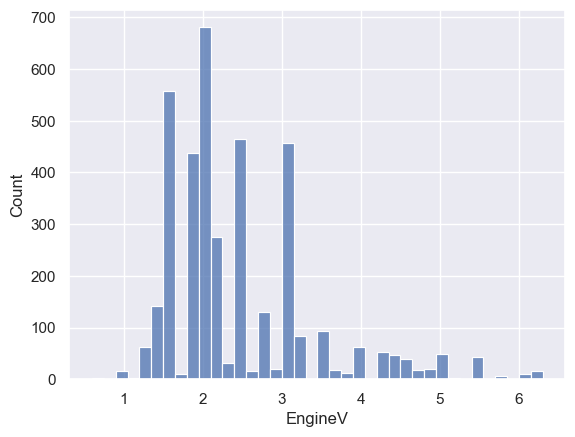

In [11]:
data = data[data['EngineV'] < 6.5]
sns.histplot(data['EngineV'])

In [12]:
value = data['Year'].quantile(0.02)
data = data[data['Year'] > value]
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4337,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,Megane
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535


In [13]:
data.describe()

,Price,Mileage,EngineV,Year
count,3787.000000,3787.000000,3787.000000,3787.000000
mean,17320.063140,161.351994,2.445376,2006.802482
std,16414.169285,93.865672,0.949884,5.811311
min,800.000000,0.000000,0.600000,1990.000000
25%,7300.000000,94.000000,1.800000,2003.000000
50%,11700.000000,158.000000,2.200000,2008.000000
75%,21200.000000,225.000000,3.000000,2011.000000
max,103333.000000,435.000000,6.300000,2016.000000


### 1.2 Data Tranformation

#### 1.2.1 Checking the OLS assumptions

Logrithmic Transformation

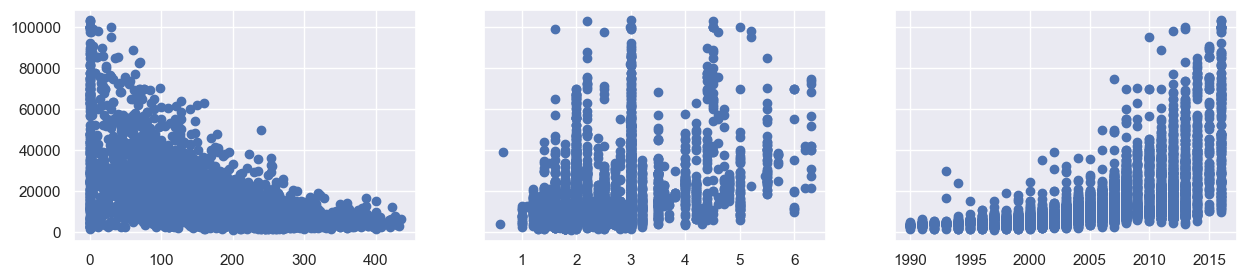

In [14]:
# Linearity 
fig , (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,3))
ax1.scatter(data['Mileage'] , data['Price'])
ax2.scatter(data['EngineV'] , data['Price'])
ax3.scatter(data['Year'] , data['Price'])

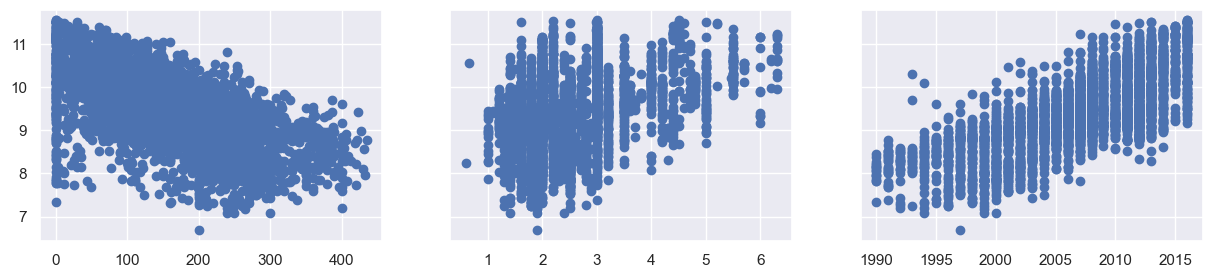

In [15]:
data.loc[:,'log_Price'] = np.log(data['Price'])
fig , (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,3))
ax1.scatter(data['Mileage'] , data['log_Price'])
ax2.scatter(data['EngineV'] , data['log_Price'])
ax3.scatter(data['Year'] , data['log_Price'])

In [16]:
# Now lets remove the previous price column since it is no longer needed 
data.drop('Price', axis = 1, inplace = True)

In [17]:
data

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_Price
0,BMW,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...
4337,Renault,sedan,152,1.6,Petrol,yes,2007,Megane,8.824678
4338,Volkswagen,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
4339,Toyota,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
4341,BMW,sedan,1,3.5,Petrol,yes,1999,535,8.779557


##### Multicolinearity

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,3.930177,Mileage
1,10.311955,Year
2,7.629411,EngineV


In [19]:
data.drop('Year', axis = 1, inplace = True)

In [20]:
data.columns.values
cols = ['log_Price', 'Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Model']
data_preprocessed = data[cols]
data_preprocessed

,log_Price,Brand,Body,Mileage,EngineV,Engine Type,Registration,Model
0,8.342840,BMW,sedan,277,2.0,Petrol,yes,320
1,8.974618,Mercedes-Benz,van,427,2.9,Diesel,yes,Sprinter 212
2,9.495519,Mercedes-Benz,sedan,358,5.0,Gas,yes,S 500
3,10.043249,Audi,crossover,240,4.2,Petrol,yes,Q7
4,9.814656,Toyota,crossover,120,2.0,Petrol,yes,Rav 4
...,...,...,...,...,...,...,...,...
4337,8.824678,Renault,sedan,152,1.6,Petrol,yes,Megane
4338,9.350102,Volkswagen,van,163,2.5,Diesel,yes,T5 (Transporter)
4339,9.792556,Toyota,sedan,35,1.6,Petrol,yes,Corolla
4341,8.779557,BMW,sedan,1,3.5,Petrol,yes,535


#### Dummy data

In [21]:
data_dummy = pd.get_dummies(data , drop_first = True)
data_dummy

,Mileage,EngineV,log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.0,8.342840,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,427,2.9,8.974618,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,358,5.0,9.495519,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,240,4.2,10.043249,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,120,2.0,9.814656,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4337,152,1.6,8.824678,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4338,163,2.5,9.350102,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4339,35,1.6,9.792556,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4341,1,3.5,8.779557,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
data_dummy.columns.values

array(['Mileage', 'EngineV', 'log_Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_116', 'Model_118', 'Model_120', 'Model_19',
       'Model_190', 'Model_200', 'Model_210', 'Model_220', 'Model_230',
       'Model_250', 'Model_316', 'Model_318', 'Model_320', 'Model_323',
       'Model_325', 'Model_328', 'Model_330', 'Model_335',
       'Model_4 Series Gran Coupe', 'Model_428', 'Model_4Runner',
       'Model_5 Series', 'Model_5 Series GT', 'Model_520', 'Model_523',
       'Model_525', 'Model_528', 'Model_530', 'Model_535', 'Model_540',
       'Model_545', 'Model_550', 'Model_6 Series Gran Coupe', 'Model_630',
       'Model_640', 'Model_645', 'Model_650', 'Model_730', 'Model_735',
       'Model_740', 'Model_745', 'Model_

In [23]:
columns_to_map = ['Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_116', 'Model_118', 'Model_120', 'Model_19',
       'Model_190', 'Model_200', 'Model_210', 'Model_220', 'Model_230',
       'Model_250', 'Model_316', 'Model_318', 'Model_320', 'Model_323',
       'Model_325', 'Model_328', 'Model_330', 'Model_335',
       'Model_4 Series Gran Coupe', 'Model_428', 'Model_4Runner',
       'Model_5 Series', 'Model_5 Series GT', 'Model_520', 'Model_523',
       'Model_525', 'Model_528', 'Model_530', 'Model_535', 'Model_540',
       'Model_545', 'Model_550', 'Model_6 Series Gran Coupe', 'Model_630',
       'Model_640', 'Model_645', 'Model_650', 'Model_730', 'Model_735',
       'Model_740', 'Model_745', 'Model_750', 'Model_760', 'Model_80',
       'Model_A 140', 'Model_A 150', 'Model_A 170', 'Model_A 180',
       'Model_A1', 'Model_A3', 'Model_A4', 'Model_A4 Allroad', 'Model_A5',
       'Model_A6', 'Model_A6 Allroad', 'Model_A7', 'Model_A8',
       'Model_ASX', 'Model_Amarok', 'Model_Auris', 'Model_Avalon',
       'Model_Avensis', 'Model_Aygo', 'Model_B 170', 'Model_B 180',
       'Model_B 200', 'Model_Beetle', 'Model_Bora', 'Model_C-Class',
       'Model_CL 180', 'Model_CL 500', 'Model_CL 55 AMG', 'Model_CL 550',
       'Model_CL 63 AMG', 'Model_CLA 200', 'Model_CLA 220',
       'Model_CLA-Class', 'Model_CLC 180', 'Model_CLC 200',
       'Model_CLK 200', 'Model_CLK 220', 'Model_CLK 230', 'Model_CLK 240',
       'Model_CLK 280', 'Model_CLK 320', 'Model_CLK 430', 'Model_CLS 350',
       'Model_CLS 400', 'Model_CLS 500', 'Model_CLS 63 AMG',
       'Model_Caddy', 'Model_Camry', 'Model_Captur', 'Model_Caravelle',
       'Model_Carina', 'Model_Carisma', 'Model_Celica', 'Model_Clio',
       'Model_Colt', 'Model_Corolla', 'Model_Corolla Verso',
       'Model_Cross Touran', 'Model_Dokker', 'Model_Duster',
       'Model_E-Class', 'Model_Eclipse', 'Model_Eos', 'Model_Espace',
       'Model_FJ Cruiser', 'Model_Fluence', 'Model_Fortuner',
       'Model_G 320', 'Model_G 500', 'Model_G 55 AMG', 'Model_G 63 AMG',
       'Model_GL 320', 'Model_GL 350', 'Model_GL 420', 'Model_GL 450',
       'Model_GL 500', 'Model_GL 550', 'Model_GLC-Class',
       'Model_GLE-Class', 'Model_GLK 220', 'Model_GLK 300',
       'Model_GLS 350', 'Model_Galant', 'Model_Golf GTI',
       'Model_Golf III', 'Model_Golf IV', 'Model_Golf Plus',
       'Model_Golf V', 'Model_Golf VI', 'Model_Golf VII',
       'Model_Golf Variant', 'Model_Grand Scenic', 'Model_Grandis',
       'Model_Hiace', 'Model_Highlander', 'Model_Hilux', 'Model_I3',
       'Model_IQ', 'Model_Jetta', 'Model_Kangoo', 'Model_Koleos',
       'Model_L 200', 'Model_LT', 'Model_Laguna', 'Model_Lancer',
       'Model_Lancer Evolution', 'Model_Lancer X',
       'Model_Lancer X Sportback', 'Model_Land Cruiser 100',
       'Model_Land Cruiser 105', 'Model_Land Cruiser 200',
       'Model_Land Cruiser 76', 'Model_Land Cruiser 80',
       'Model_Land Cruiser Prado', 'Model_Latitude', 'Model_Logan',
       'Model_Lupo', 'Model_M5', 'Model_M6', 'Model_ML 250',
       'Model_ML 270', 'Model_ML 280', 'Model_ML 320', 'Model_ML 350',
       'Model_ML 400', 'Model_ML 430', 'Model_ML 500', 'Model_ML 550',
       'Model_ML 63 AMG', 'Model_Master', 'Model_Matrix', 'Model_Megane',
       'Model_Modus', 'Model_Multivan', 'Model_New Beetle',
       'Model_Outlander', 'Model_Outlander XL', 'Model_Pajero',
       'Model_Pajero Pinin', 'Model_Pajero Sport', 'Model_Pajero Wagon',
       'Model_Passat B3', 'Model_Passat B4', 'Model_Passat B5',
       'Model_Passat B6', 'Model_Passat B7', 'Model_Passat B8',
       'Model_Passat CC', 'Model_Phaeton', 'Model_Pointer', 'Model_Polo',
       'Model_Previa', 'Model_Prius', 'Model_Q3', 'Model_Q5', 'Model_Q7',
       'Model_R 320', 'Model_R8', 'Model_Rav 4', 'Model_S 140',
       'Model_S 250', 'Model_S 300', 'Model_S 320', 'Model_S 350',
       'Model_S 400', 'Model_S 430', 'Model_S 500', 'Model_S 550',
       'Model_S 600', 'Model_S 63 AMG', 'Model_S 65 AMG', 'Model_S4',
       'Model_S5', 'Model_S8', 'Model_SL 500 (550)', 'Model_SL 55 AMG',
       'Model_SLK 200', 'Model_SLK 350', 'Model_Sandero',
       'Model_Sandero StepWay', 'Model_Scenic', 'Model_Scion',
       'Model_Scirocco', 'Model_Sequoia', 'Model_Sharan', 'Model_Sienna',
       'Model_Smart', 'Model_Space Star', 'Model_Space Wagon',
       'Model_Sprinter 208', 'Model_Sprinter 210', 'Model_Sprinter 211',
       'Model_Sprinter 212', 'Model_Sprinter 213', 'Model_Sprinter 311',
       'Model_Sprinter 312', 'Model_Sprinter 313', 'Model_Sprinter 315',
       'Model_Sprinter 316', 'Model_Sprinter 318', 'Model_Sprinter 319',
       'Model_Symbol', 'Model_Syncro', 'Model_T4 (Transporter)',
       'Model_T4 (Transporter) ', 'Model_T5 (Transporter)',
       'Model_T5 (Transporter) ', 'Model_T6 (Transporter)',
       'Model_T6 (Transporter) ', 'Model_TT', 'Model_Tacoma',
       'Model_Tiguan', 'Model_Touareg', 'Model_Touran', 'Model_Trafic',
       'Model_Tundra', 'Model_Up', 'Model_V 250', 'Model_Vaneo',
       'Model_Vento', 'Model_Venza', 'Model_Viano', 'Model_Virage',
       'Model_Vista', 'Model_Vito', 'Model_X1', 'Model_X3', 'Model_X5',
       'Model_X5 M', 'Model_X6', 'Model_X6 M', 'Model_Yaris', 'Model_Z3',
       'Model_Z4']
mapping_function = lambda x: 1 if x else 0
data_dummy3 = data_dummy
data_dummy3[columns_to_map] = data_dummy[columns_to_map].applymap(mapping_function)

In [24]:
data_dummy3

,Mileage,EngineV,log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.0,8.342840,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,427,2.9,8.974618,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,358,5.0,9.495519,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240,4.2,10.043249,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,2.0,9.814656,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4337,152,1.6,8.824678,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4338,163,2.5,9.350102,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4339,35,1.6,9.792556,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4341,1,3.5,8.779557,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Linear Regression

### Declare input and target

In [25]:
target = data_dummy3['log_Price']
features = data_dummy3.drop('log_Price', axis = 1)

### Feature Scaling

In [26]:
scaler = StandardScaler()
scaler.fit(features, target)
features = scaler.transform(features)

### Train Test Split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

### Make Regression Model

In [31]:
reg = LinearRegression()
reg.fit(features, target)
y_hat = reg.predict(x_train)

(6.0, 13.0)

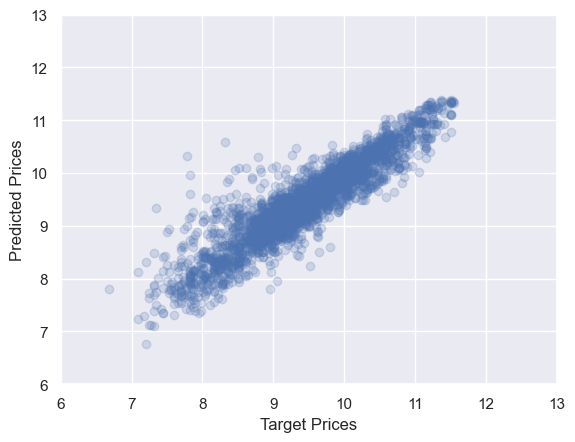

In [34]:
plt.scatter(y_train, y_hat, alpha = 0.2)
plt.ylabel('Predicted Prices')
plt.xlabel('Target Prices')
plt.xlim(6, 13)
plt.ylim(6, 13)

<Axes: xlabel='log_Price', ylabel='Density'>

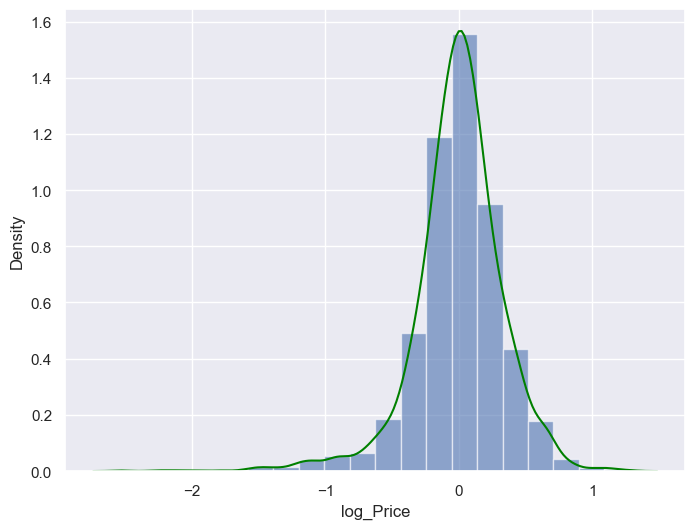

In [40]:
residuals = y_train - y_hat
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
# Create a histogram of residuals
plt.hist(residuals, bins=20, density=True, alpha=0.6, label='Histogram')
# Add a kernel density estimate (KDE) line plot
sns.kdeplot(residuals, color='green', label='KDE')

### Weight and bias

In [38]:
coefficients = reg.coef_  # Replace with your actual coefficient values
reg_summary = pd.DataFrame({'Features':  data_dummy3.drop('log_Price', axis = 1).columns, 'Weight': coefficients})

In [39]:
reg_summary

,Features,Weight
0,Mileage,-3.504974e-01
1,EngineV,3.717230e-02
2,Brand_BMW,1.607830e+11
3,Brand_Mercedes-Benz,1.708532e+11
4,Brand_Mitsubishi,-2.004195e+12
...,...,...
291,Model_X6,1.708984e-01
292,Model_X6 M,5.206299e-02
293,Model_Yaris,-1.005024e+11
294,Model_Z3,1.189804e-02


### Testing

In [41]:
y_hat_test = reg.predict(x_test)

(6.0, 13.0)

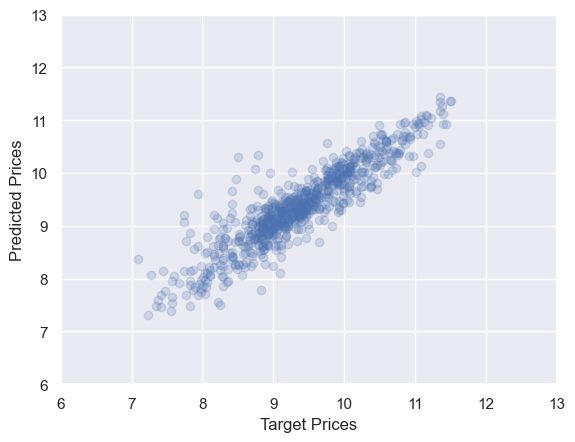

In [43]:
plt.scatter(y_test, y_hat_test, alpha = 0.2)
plt.ylabel('Predicted Prices')
plt.xlabel('Target Prices')
plt.xlim(6, 13)
plt.ylim(6, 13)

In [45]:
# To see how well we have predicted 
predicted_value = pd.DataFrame(np.exp(y_hat_test), columns = ['Predicted Price'])
predicted_value['Target'] = np.exp(y_test)
predicted_value
# The problem here is due the preserved indicies of Target values and we have to reset them to achieve 
# proper result

,Predicted Price,Target
0,25305.594715,4200.0
1,20999.572257,NaN
2,8226.562759,NaN
3,7803.980349,NaN
4,6472.886765,NaN
...,...,...
753,31259.684033,NaN
754,14951.032920,NaN
755,56603.975271,NaN
756,23412.421555,6500.0


In [46]:
y_test = y_test.reset_index(drop = True)
predicted_value.drop('Target', axis = 1, inplace = True)
predicted_value['Target'] = np.exp(y_test)
predicted_value

,Predicted Price,Target
0,25305.594715,24000.0
1,20999.572257,22000.0
2,8226.562759,8700.0
3,7803.980349,7700.0
4,6472.886765,9500.0
...,...,...
753,31259.684033,29900.0
754,14951.032920,13400.0
755,56603.975271,51500.0
756,23412.421555,16800.0


In [47]:
predicted_value['Residual'] =  predicted_value['Target'] - predicted_value['Predicted Price'] 
predicted_value

,Predicted Price,Target,Residual
0,25305.594715,24000.0,-1305.594715
1,20999.572257,22000.0,1000.427743
2,8226.562759,8700.0,473.437241
3,7803.980349,7700.0,-103.980349
4,6472.886765,9500.0,3027.113235
...,...,...,...
753,31259.684033,29900.0,-1359.684033
754,14951.032920,13400.0,-1551.032920
755,56603.975271,51500.0,-5103.975271
756,23412.421555,16800.0,-6612.421555


In [48]:
predicted_value['Difference%'] = np.absolute(predicted_value['Residual']/predicted_value['Target']* 100)
predicted_value

,Predicted Price,Target,Residual,Difference%
0,25305.594715,24000.0,-1305.594715,5.439978
1,20999.572257,22000.0,1000.427743,4.547399
2,8226.562759,8700.0,473.437241,5.441807
3,7803.980349,7700.0,-103.980349,1.350394
4,6472.886765,9500.0,3027.113235,31.864350
...,...,...,...,...
753,31259.684033,29900.0,-1359.684033,4.547438
754,14951.032920,13400.0,-1551.032920,11.574873
755,56603.975271,51500.0,-5103.975271,9.910632
756,23412.421555,16800.0,-6612.421555,39.359652


In [49]:
predicted_value.sort_values(by = 'Difference%')

,Predicted Price,Target,Residual,Difference%
392,14007.527199,13999.0,-8.527199,0.060913
397,6307.524462,6300.0,-7.524462,0.119436
658,14976.605847,14999.0,22.394153,0.149304
526,4507.784449,4500.0,-7.784449,0.172988
420,17612.321608,17650.0,37.678392,0.213475
...,...,...,...,...
362,19705.611363,4800.0,-14905.611363,310.533570
383,9996.074825,2300.0,-7696.074825,334.611949
198,31031.567675,6500.0,-24531.567675,377.408733
222,14686.932068,2800.0,-11886.932068,424.533288
